In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Представьте, что у вас есть датафрэйм df, хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

In [4]:
df = pd.read_csv("../data/income.csv")
df.head()

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


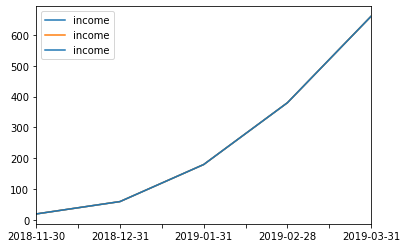

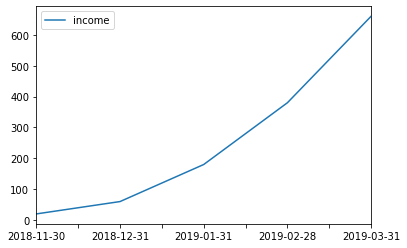

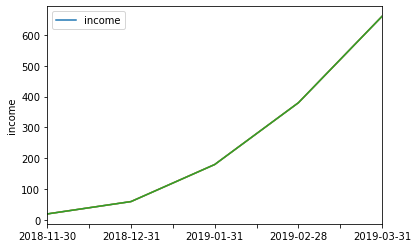

In [12]:
df.income.plot();
df['income'].plot();
sns.lineplot(data=df);
df.plot();
df.plot(kind='line');
plt.plot(df.index, df.income);
sns.lineplot(x=df.index, y=df.income);

Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

In [31]:
df = pd.read_csv("../data/dataset_209770_6 (1).txt", sep=" ")
df.head()

,x,y
0,1092.672638,504.855159
1,599.840262,1097.134314
2,1308.471591,1306.225252
3,102.751715,87.434262
4,1395.851202,1194.190876


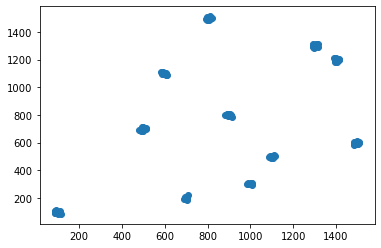

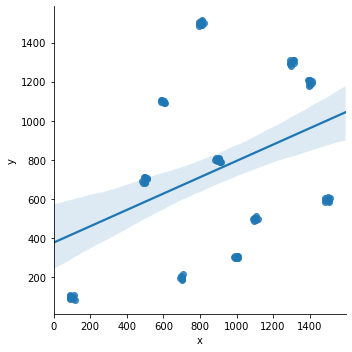

In [30]:
plt.scatter(df.x, df.y)
sns.lmplot(x='x',y='y',data=df);

___
Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

In [33]:
df = pd.read_csv("../data/genome_matrix.csv", index_col=0)
df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


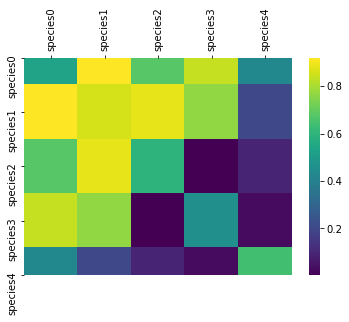

In [40]:
g = sns.heatmap(df, cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

___
Пришло время узнать,  какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

In [43]:
df = pd.read_csv("../data/dota_hero_stats.csv", index_col=0)
df.head(1)

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"


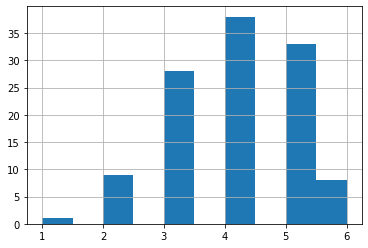

In [59]:
df["cnt"] = df.roles.str.count(',') + 1
df.cnt.hist()

In [61]:
df.cnt.mode()

0    4
dtype: int64

___
Помогите  узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график.

Распределение должно быть по всем образцам, без разделения на вид.
Чтобы построить на 1-ом графике распределения для каждого из параметров, можно воспользоваться петлёй

In [78]:
df = pd.read_csv("../data/iris.csv", index_col=0)
df.describe()

,sepal length,sepal width,petal length,petal width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


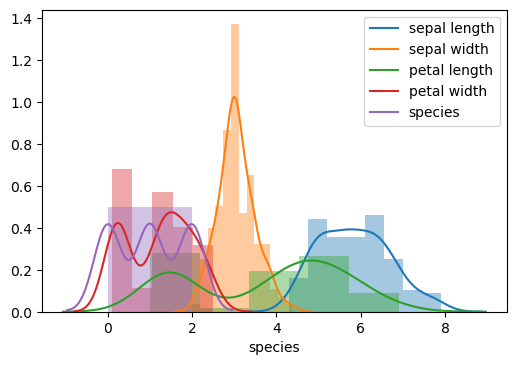

In [77]:
plt.figure(dpi=100)
for c in df:
    sns.distplot(df[c], kde_kws={ "label":c})

F:\CodingForPython\Anaconda\envs\py37\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
F:\CodingForPython\Anaconda\envs\py37\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


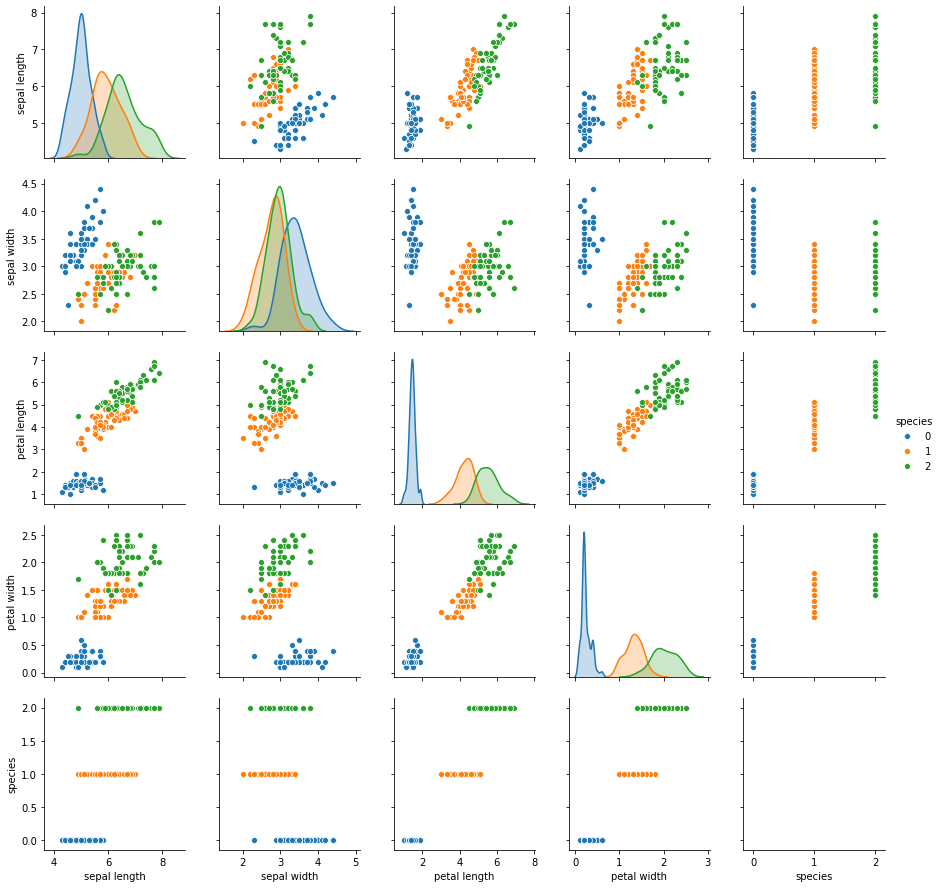

In [83]:
sns.pairplot(df, diag_kind='kde', hue="species")

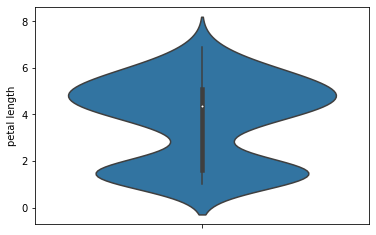

In [82]:
sns.violinplot(y=df["petal length"])

In [84]:
df.corr()

,sepal length,sepal width,petal length,petal width,species
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000
